Análisis exploratorio de datos
============================

Unidad 1-2 - Parte práctica - Solución
-----------------------------------------------------


### Ejercicio 1

Carga los datos del archivo `Coursera.csv`, que puedes encontrar en la carpeta `data`, en forma de dataframe. Este conjunto de datos de la web [Kaggle](https://www.kaggle.com/datasets/everydaycodings/multi-platform-online-courses-dataset?select=Coursera.csv) recoge información sobre distintas plataformas online de cursos.

a) Primer de todo vamos a explorar el dataset. Carga los datos y muestra su tamaño y el nombre de las columnas. Muestra también por pantalla las 5 primeras filas.

b) Comprueba si hay valores nulos (NaNs) en este dataset.

c) Hay distintas compañias que ofrecen cursos (*partners). Explora el dataset y responde las preguntas siguientes:
- ¿Qué partners hay y cuantos cursos tiene cada uno?
- ¿Qué partner tiene más cursos?
- ¿Qué partner tiene la mejor media de cursos?

d) ¿Cuál es el valor máximo de reviews? ¿Y en qué curso se encuentra?

e) ¿Qué skill aparece más frequentemente en los cursos?

f) ¿Qué niveles hay y cuantos cursos de cada uno? A continuación crea un gráfico circular (pie chart) para mostrar esta información.

g) ¿Los cursos con mayor duración tienen mejor puntuación? Correlaciona ambas variables.

h) ¿Qué tipos de certificados hay? ¿Qué tipo es el más común en los cursos de Google?

i) ¿Cómo se reparten los valores de la columna crediteligibility? ¿Cuál es el más frecuente? Muestra la información de la columna crediteligibility con un gráfico de barras.




In [21]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 1-2
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad1_2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad1_2


In [22]:
#a)

# Importamos la librería pandas
import pandas as pd
import seaborn as sns

# Cargamos el archivo csv en un DataFrame
coursera_df = pd.read_csv("data/Coursera.csv", encoding='utf-8', encoding_errors='replace')

# Mostramos el tamaño del df
print("Tamaño df:\n", coursera_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", coursera_df.columns)

# Visualizamos las 5 primeras filas con el comando head()
coursera_df.head()

Tamaño df:
 (1139, 9)
Columnas del df:
 Index(['partner', 'course', 'skills', 'rating', 'reviewcount', 'level',
       'certificatetype', 'duration', 'crediteligibility'],
      dtype='object')


,partner,course,skills,rating,reviewcount,level,certificatetype,duration,crediteligibility
0,Google,Google Cybersecurity,"{"" Network Security"","" Python Programming"","" L...",4.8,16.4k,Beginner,Professional Certificate,3 - 6 Months,False
1,Google,Google Data Analytics,"{"" Data Analysis"","" R Programming"","" SQL"","" Bu...",4.8,133.4k,Beginner,Professional Certificate,3 - 6 Months,True
2,Google,Google Project Management:,"{"" Project Management"","" Strategy and Operatio...",4.8,97.3k,Beginner,Professional Certificate,3 - 6 Months,True
3,Google,Google Digital Marketing & E-commerce,"{"" Digital Marketing"","" Marketing"","" Marketing...",4.8,21.4k,Beginner,Professional Certificate,3 - 6 Months,False
4,Google,Google IT Support,"{"" Computer Networking"","" Network Architecture...",4.8,181.4k,Beginner,Professional Certificate,3 - 6 Months,True


In [23]:
# b) Miramos si hay NaNs
coursera_df.isna().sum()

,0
partner,0
course,0
skills,51
rating,146
reviewcount,146
level,135
certificatetype,23
duration,23
crediteligibility,0


In [24]:
#c1) ¿Qué partners hay y cuantos cursos tiene cada uno?

n_partners = coursera_df.partner.nunique()
# Creamos un df con el top10 de paises con más youtubers
partners = coursera_df.groupby("partner").course.count().sort_values(ascending=False).reset_index()
# Mostramos el número de youtubers por país
print(f"Tenemos {n_partners} partners, con la siguiente distribución: \n", partners)

#c2) ¿Qué partner tiene más cursos?
# Seleccionamos el 1r partner
print(f"El partner con más cursos es {partners.partner[0]} con {partners.course[0]} cursos.")

Tenemos 180 partners, con la siguiente distribución: 
                                          partner  course
0                                         Google     101
1                                            IBM      86
2                     University of Pennsylvania      56
3                                DeepLearning.AI      44
4                         University of Michigan      42
..                                           ...     ...
175                New York Institute of Finance       1
176          National Academy of Sports Medicine       1
177  Nanyang Technological University, Singapore       1
178                                       NVIDIA       1
179                    École des Ponts ParisTech       1

[180 rows x 2 columns]
El partner con más cursos es Google con 101 cursos.


In [25]:
#c3) ¿Qué partner tiene la mejor media de cursos?
coursera_df.groupby("partner").rating.mean().sort_values(ascending=False).reset_index()


,partner,rating
0,"Nanyang Technological University, Singapore",4.90
1,"Akamai Technologies, Inc.",4.90
2,Hebrew University of Jerusalem,4.90
3,The University of Chicago,4.90
4,"Parsons School of Design, The New School",4.85
...,...,...
175,University of Illinois,NaN
176,University of Illinois,NaN
177,University of Maryland Global Campus,NaN
178,University of Massachusetts Global,NaN


In [26]:
#d) ¿Cuál es el valor máximo de reviews? ¿Y en qué curso se encuentra?

# Vamos a mostrar el máximo de la columna reviewcount
#print(coursera_df.reviewcount.max())

# Nos sale None como max

# Vamos a mirar los valores únicos de reviewcount
print(coursera_df.reviewcount.unique()[0:10])
# Son todo strings, y con valores expresiones con k. Esto se debería arreglar


['16.4k' '133.4k' '97.3k' '21.4k' '181.4k' '118.9k' '73.7k' '71.5k'
 '17.7k' '85k']


In [27]:
#e) ¿Qué skill aparece más frequentemente en los cursos?
coursera_df.groupby("skills").course.count().sort_values(ascending=False).reset_index()

# Vemos que un curso tiene diferentes skills, esto se debería codificar diferente
# Cada skill debería estar por separado, no dentro de un diccionario en la tabla

,skills,course
0,"{""""}",19
1,"{"" Communication""}",8
2,"{"" Writing""}",8
3,"{"" Critical Thinking""}",8
4,"{"" Computer Programming"","" Python Programming""}",5
...,...,...
972,"{"" Cryptography"","" Python Programming"","" Linux...",1
973,"{"" Cryptography"","" Security Software"","" Cybera...",1
974,"{"" Culture"","" Leadership and Management"","" Pro...",1
975,"{"" Customer Relationship Management"","" Sales"",...",1


In [28]:
#f1)¿Qué niveles hay y cuantos cursos de cada uno?
coursera_df.groupby("level").course.count().sort_values(ascending=False).reset_index()


,level,course
0,Beginner,675
1,Intermediate,200
2,Mixed,89
3,Advanced,36
4,Course,2
5,Degree,1
6,Specialization,1


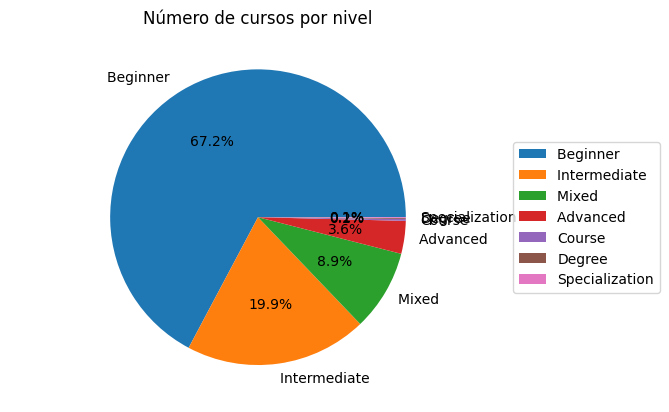

In [29]:
# f2) Hacemos un pie chart con esta información

# Importamos la librería matplotlib
import matplotlib.pyplot as plt

# Creamos un nuevo df con el número de youtubers por cada categoría
coursera_levels = coursera_df.groupby("level").course.count().sort_values(ascending=False).reset_index()

# Creamos la información para la leyenda
labels = coursera_levels['level']

# Especificamos la información de los ejes
plt.axis("equal")
plt.pie(coursera_levels['course'], labels=labels, autopct='%1.1f%%')
# autopct muestra el porcentaje (%)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Número de cursos por nivel')
plt.show()

In [30]:
#g) ¿Los cursos con mayor duración tienen mejor puntuación? Correlaciona ambas variables

# Mostramos los valores de duration
print("Los valores de las puntuaciones son:\n", coursera_df.rating.unique())

# Mostramos los valores de duration
print("Los valores de la duración son:\n", coursera_df.duration.unique())

# No podemos hacer la correlación de arrays de string!
# Tenemos que transformar los datos a variables numéricas

Los valores de las puntuaciones son:
 [4.8 4.6 4.9 4.7 nan 4.5 4.4 4.  4.2 3.3 3.9 4.3 5.  2.8 3.7 3.2 2.9]
Los valores de la duración son:
 [' 3 - 6 Months' ' 1 - 3 Months' ' 1 - 4 Weeks' nan ' Less Than 2 Hours'
 ' 1 - 4 Years' ' 24 meses.' ' 24 meses' ' 26 meses' ' 4 meses' ' 6 meses'
 ' 4-6 months to complete' ' 4 months to complete' ' 4 months'
 ' 6-7 months to complete' ' 16 – 60 months' ' 24 - 60 months'
 ' 24 months' ' 6 - 12 Months' ' 15+ hours of study/wk per course'
 ' 2 years' ' 3 – 6 years' ' 12 months' ' 1 year' ' 24 to 60 months'
 ' 4 years' ' 1 – 3 years' ' 24 - 36 months' ' 18-24 Months'
 ' 2 to 4 years depending on beginning credits and course load'
 ' 3- 6 years' ' 1.5 – 3 years' ' 4-8 years' ' 2 – 3 years'
 ' 2 or 3 years' '  24 - 36 months' ' 18 a 24 meses']


In [31]:
#h) ¿Qué tipos de certificados hay?

# Mostramos los valores de certificatetype
print("Los valores de la duración son:\n", coursera_df.certificatetype.unique())

#¿Qué tipo es el más común en los cursos de Google?
coursera_df[
    coursera_df.partner=='Google'
    ].groupby("certificatetype").course.count().sort_values(ascending=False).reset_index()

Los valores de la duración son:
 [' Professional Certificate ' ' Specialization ' ' Course ' nan
 ' Guided Project ' 'Degree ' 'Mastertrack ' 'Postgraduate Diploma '
 'Graduate Certificate ' 'University Certificate ']


,certificatetype,course
0,Course,58
1,Professional Certificate,34


In [32]:
#i1) ¿Cómo se reparten los valores de la columna crediteligibility? ¿Cuál es el más frecuente?

# Mostramos el número de cursos por crediteligibility (True o False)
coursera_df.groupby("crediteligibility").course.count().sort_values(ascending=False).reset_index()

,crediteligibility,course
0,False,1000
1,True,139


Text(0, 0.5, 'Número de cursos')

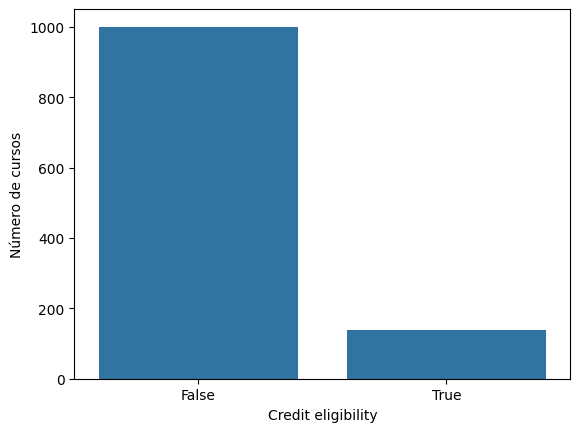

In [33]:
#i2) Mostrar gráfico de barras de la columna crediteligibility

# Importamos la librería seaborn
import seaborn as sns

# En este caso usamos un countplot
sns.countplot(coursera_df, x="crediteligibility")

# Incluimos el nombre de los ejes
plt.xlabel('Credit eligibility')
plt.ylabel('Número de cursos')